<a href="https://colab.research.google.com/github/joydeep03564/Machine_Learning-/blob/master/BBC_all_models_dataset_classicalML_MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The BBC news classification is one of most popular dataset for news classifcation.
The objective of this problem is to automatically classify unseen news.


In [1]:
# mounting google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


The dataset is available at kaggle. I have already downloaded that in my google drive.

In [2]:
## Importing libraries for the project 
import pandas as pd 
import numpy as numpy 
import matplotlib.pyplot as plt 


Loading the csv files using pandas 

In [3]:
#Loading the dataset 
data= pd.read_csv("/content/drive/MyDrive/NLP/NLP_Projects/BCG_dataset/bbc-text1.csv")

In [4]:
data.head()

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...


From the dataset,we can understand that we have a text feature and target label. We can pose this problem as typical text classification problem - where we have a text feature and based on that feature we have to build the classification system whch can classify unseen news into categories like sports,business,entertainment etc.

### Exploring the dataset :
In this section, we will understand the following 

1. How many datapoints we have ?
2. Is there are NAN values present ?
3. Is there are duplicate values ?
4. How many categories are there?
5. Is the dataset is imbalanced?

In [5]:
data.shape

(2225, 2)

There are 2225 data points.

Finding the NAN values in the dataset 

In [6]:
data.isnull().sum()

category    0
text        0
dtype: int64

We don't have null values in the dataset

Finding the duplicate values:

In [7]:
data_duplicated = data[data.duplicated(['text','category'])]

In [8]:
data_duplicated.shape

(99, 2)

In [9]:
data_duplicated.head()

,category,text
85,politics,hague given up his pm ambition former conser...
301,politics,fox attacks blair s tory lies tony blair lie...
496,tech,microsoft gets the blogging bug software giant...
543,business,economy strong in election year uk businesse...
582,entertainment,ray dvd beats box office takings oscar-nominat...


The following 99 data points are duplicate. As we have very less datapoints removing them will create problem and for this problem, we are going to ignore the duplicate.
We could have removed the duplicate points if there were more data points. 

Finding the categories:


In [10]:
class_df = pd.DataFrame(data['category'].value_counts())

In [11]:
class_df

,category
sport,511
business,510
politics,417
tech,401
entertainment,386


We can see that there is no imbalance class in the dataset 

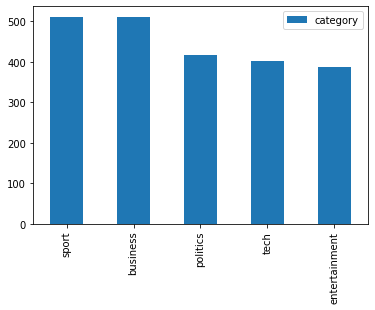

In [12]:
class_df.plot.bar()

### Text preprocessing 

We understand from exploration that we have 5 classes and our problem is multi-class classification problem. The next step is to preprocess our text columms and label columms such that our machine learning algorithims can understand.
There are multiple ways to vectorise the text data but for this case we will be using TFIDF based teqnique. 
          Before we transform the text into TFIDF based Vector representation, we need to clean the text dataset so that only meaningfull words are vectorised.



In the section, we will  first clean the text data. The following step we are going to perform:

1. converting all text into lower 
2. Removing punctuations 
3. Removing words with numbers 
4. Removing HTML tags if any 
5. Removing URLS if any 
6. Removing Stop words 
7. Lematize the words into the base form
8. Decontraction of words

In [13]:
# Creating the helperfunctions 
import re
def decontracted(text):
  """This function will decontact the contracted words: 
  it takes 'text' as input parameter and returns the decontracted text """
    
  text = re.sub(r"won't", "will not", text)
  text = re.sub(r"can\'t", "can not", text)
  text  = re.sub(r"she's","she is",text)
  text = re.sub(r"n't","not",text)
  text = re.sub(r"what's","what is",text)
  text = re.sub(r"it's","it is",text)
  text = re.sub(r"'s"," own",text)
  text = re.sub("%","percent",text)
  text = re.sub("₹",'rupee',text)
  text = re.sub("$","dollar",text)
  text = re.sub("€","euro",text)
  text = re.sub("cannot","can not",text)
  text = re.sub(r"n\'t", " not", text)
  text = re.sub(r"\'re", " are", text)
  text = re.sub(r"\'s", " is", text)
  text = re.sub(r"\'d", " would", text)
  text = re.sub(r"\'ll", " will", text)
  text = re.sub(r"\'t", " not", text)
  text = re.sub(r"\'ve", " have", text)
  text = re.sub(r"\'m", " am", text)
  return text

In [14]:
# Remove the urls, this functions will remove the urls

def remove_urls(text):
  url_pattern = re.compile(r'https?://\S+|www\.\S+')
  return url_pattern.sub(r'', text)


In [15]:
# Removing numbers from the words suppose you have a word like word2vec then  this function will remove 2 from it.
# Test case for this function: Input: "1joy2dee3p" and Output:"Joydeep"
def remove_numbers(text):

  res=''.join([i for i in text if not i.isdigit()])

  return res
    

In [16]:
# Removing non word text:
#The \W metacharacter is used to find a non-word character.
#A word character is a character from a-z, A-Z, 0-9, including the _ (underscore) character.
def remove_nonwords(text):
  pattern = re.compile('\W')

  if type(text)==type(''):
    text = re.sub(pattern,' ',text)

  return text

In [17]:
# removing html tag. We don't have much of the html tags but as the corpus is huge, in order to avoid that we are going to design a function to remove html tags and get us the results
from bs4 import BeautifulSoup

def remove_htmltags(text):

  cleantext = re.compile(r'<[^>]+>').sub('',text) # https://www.geeksforgeeks.org/program-to-remove-html-tags-from-a-given-string/
  cleantext = BeautifulSoup(text, "lxml").text

  return cleantext


In [18]:
def remove_multiple_space(text):

  text = re.sub(' +',' ',text)

  return text

The main function which will call all helper function and  going to perform the text cleaning is implemented below:

In [19]:
def text_cleaning(text):
  text=str(text).lower()
  text = decontracted(text)
  text = remove_urls(text)
  text = remove_htmltags(text)
  text = remove_numbers(text)
  text = remove_nonwords(text)
  text = remove_multiple_space(text)
  #text = remove_stopwords(text)
  return text

In [20]:
data['text']=data['text'].apply(text_cleaning)

In [21]:
data['text'][0]

'tv future in the hands of viewers with home theatre systems plasma high definition tvs and digital video recorders moving into the living room the way people watch tv will be radically different in five years time that is according to an expert panel which gathered at the annual consumer electronics show in las vegas to discuss how these new technologies will impact one of our favourite pastimes with the us leading the trend programmes and other content will be delivered to viewers via home networks through cable satellite telecoms companies and broadband service providers to front rooms and portable devices one of the most talked about technologies of ces has been digital and personal video recorders dvr and pvr these set top boxes like the us s tivo and the uk s sky system allow people to record store play pause and forward wind tv programmes when they want essentially the technology allows for much more personalised tv they are also being built in to high definition tv sets which a

The next step is to perform stemming using wordnet Lemmatizer:


In [22]:
#https://www.machinelearningplus.com/nlp/lemmatization-examples-python/
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

In [23]:
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [24]:
#https://gaurav5430.medium.com/using-nltk-for-lemmatizing-sentences-c1bfff963258




lemmatizer = WordNetLemmatizer()

# function to convert nltk tag to wordnet tag
def nltk_tag_to_wordnet_tag(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:          
        return None

def lemmatize_sentence(sentence):
    #tokenize the sentence and find the POS tag for each token
    nltk_tagged = nltk.pos_tag(nltk.word_tokenize(sentence))  
    #tuple of (token, wordnet_tag)
    wordnet_tagged = map(lambda x: (x[0], nltk_tag_to_wordnet_tag(x[1])), nltk_tagged)
    lemmatized_sentence = []
    for word, tag in wordnet_tagged:
        if tag is None:
            #if there is no available tag, append the token as is
            lemmatized_sentence.append(word)
        else:        
            #else use the tag to lemmatize the token
            lemmatized_sentence.append(lemmatizer.lemmatize(word, tag))
    return " ".join(lemmatized_sentence)

In [25]:
# Finally applying the lemmatizer on our data set:
data['text']=data['text'].apply(lemmatize_sentence)

In [26]:
data['text'][10]

'berlin cheer for anti nazi film a german movie about an anti nazi resistance heroine have draw loud applause at berlin film festival sophie scholl the final day portray the final day of the member of the white rise movement scholl be arrest and behead with her brother han in for distribute leaflet condemn the abhorrent tyranny of adolf hitler director marc rothemund say i have a feeling of responsibility to keep the legacy of the scholls go we must somehow keep their idea alive he add the film draw on transcript of gestapo interrogation and scholl s trial preserve in the archive of communist east germany s secret police their discovery be the inspiration behind the film for rothemund who work closely with survive relative include one of scholl s sister to ensure historical accuracy on the film scholl and other member of the white rise resistance group first start distribute anti nazi leaflet in the summer of they be arrest as they drop leaflet at munich university call for a day of re

Now we will remove the stop words:


In [27]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [28]:
def remove_stopwords(text):
  stop_words = set(stopwords.words('english'))

  text =[ word  for word in text.split() if not  word.lower() in stop_words]

  return text

In [29]:
data['text']=data['text'].apply(remove_stopwords)

In [30]:
data['text'][0]

['tv',
 'future',
 'hand',
 'viewer',
 'home',
 'theatre',
 'system',
 'plasma',
 'high',
 'definition',
 'tv',
 'digital',
 'video',
 'recorder',
 'move',
 'living',
 'room',
 'way',
 'people',
 'watch',
 'tv',
 'radically',
 'different',
 'five',
 'year',
 'time',
 'accord',
 'expert',
 'panel',
 'gather',
 'annual',
 'consumer',
 'electronics',
 'show',
 'la',
 'vegas',
 'discuss',
 'new',
 'technology',
 'impact',
 'one',
 'favourite',
 'pastime',
 'us',
 'lead',
 'trend',
 'programme',
 'content',
 'deliver',
 'viewer',
 'via',
 'home',
 'network',
 'cable',
 'satellite',
 'telecom',
 'company',
 'broadband',
 'service',
 'provider',
 'front',
 'room',
 'portable',
 'device',
 'one',
 'talked',
 'technology',
 'ce',
 'digital',
 'personal',
 'video',
 'recorder',
 'dvr',
 'pvr',
 'set',
 'top',
 'box',
 'like',
 'us',
 'tivo',
 'uk',
 'sky',
 'system',
 'allow',
 'people',
 'record',
 'store',
 'play',
 'pause',
 'forward',
 'wind',
 'tv',
 'programme',
 'want',
 'essentially',
 '

Apart from important words all other words are removed from the sentence. Converting this words into numbercal values will help the machne learning algorithim classify to learns the patterns.

In [31]:
# Tokenised data gives issues while building TF-Idf vectorisers 
# We are converting back them  into strings 
data['text']=data['text'].apply(lambda x: ' '.join(x))

In [32]:
data['text'][0]

'tv future hand viewer home theatre system plasma high definition tv digital video recorder move living room way people watch tv radically different five year time accord expert panel gather annual consumer electronics show la vegas discuss new technology impact one favourite pastime us lead trend programme content deliver viewer via home network cable satellite telecom company broadband service provider front room portable device one talked technology ce digital personal video recorder dvr pvr set top box like us tivo uk sky system allow people record store play pause forward wind tv programme want essentially technology allow much personalised tv also build high definition tv set big business japan us slow take europe lack high definition program people forward wind advert also forget abide network channel schedule put together la carte entertainment us network cable satellite company worried mean term advertising revenue well brand identity viewer loyalty channel although us lead te

It is always a good practice to store the cleaned data so that we can use it for futher experiments  

In [33]:
data.to_csv("/content/drive/MyDrive/NLP/NLP_Projects/BCG_dataset/cleaned_dataset",header=True,index=False)

Checking the new dataset 

In [34]:
cleaned_data =  pd.read_csv("/content/drive/MyDrive/NLP/NLP_Projects/BCG_dataset/cleaned_dataset")

In [35]:
cleaned_data.head()

,category,text
0,tech,tv future hand viewer home theatre system plas...
1,business,worldcom bos leave book alone former worldcom ...
2,sport,tiger wary farrell gamble leicester say rush m...
3,sport,yeading face newcastle fa cup premiership side...
4,entertainment,ocean twelve raid box office ocean twelve crim...


### Spliting the data into feature and labels

In [36]:
x = data.iloc[:,1]

In [37]:
x[0]

'tv future hand viewer home theatre system plasma high definition tv digital video recorder move living room way people watch tv radically different five year time accord expert panel gather annual consumer electronics show la vegas discuss new technology impact one favourite pastime us lead trend programme content deliver viewer via home network cable satellite telecom company broadband service provider front room portable device one talked technology ce digital personal video recorder dvr pvr set top box like us tivo uk sky system allow people record store play pause forward wind tv programme want essentially technology allow much personalised tv also build high definition tv set big business japan us slow take europe lack high definition program people forward wind advert also forget abide network channel schedule put together la carte entertainment us network cable satellite company worried mean term advertising revenue well brand identity viewer loyalty channel although us lead te

In [38]:
x.shape

(2225,)

Here we are puttng our text feature into a variable x for just convenience

In [39]:
#Similarly labels into y:

y = data.iloc[:,0]


In [40]:
y[0]

'tech'

### Test Train Split

We are spliting it 90% and 10% ratio

In [41]:
from pandas.core.common import random_state
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42,test_size=0.1,shuffle=True)

### Converting the labels into numerical:


In [42]:
from sklearn.preprocessing import LabelEncoder

Labelencoder=LabelEncoder()
y_train=Labelencoder.fit_transform(y_train)
y_test = Labelencoder.transform(y_test)


### Building Model_0 with Naive Baiyes 

In [43]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
# Creating tokenization  and modelling pipeline
model_0 = Pipeline([
                    ("tfidf",TfidfVectorizer(max_features=2500)),
                    ("clf",MultinomialNB())

])

model_0.fit(x_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer(max_features=2500)),
                ('clf', MultinomialNB())])

In [44]:
baseline_score_model_0 = model_0.score(x_test,y_test)
print(f"The accuracy of our model with Naive Bayes is {baseline_score_model_0*100:.2f}%")

The accuracy of our model with Naive Bayes is 95.52%


In [45]:
baseline_prediction_model_0 = model_0.predict(x_test)

In [46]:
from sklearn.metrics import accuracy_score,precision_recall_fscore_support

def model_evaluation_matrix(y_true,y_pred):

  # model accuracy 
  model_accuracy = accuracy_score(y_true,y_pred)
  # Calculate the precision,recall, f1 
  model_precision,model_recall,model_f1,_= precision_recall_fscore_support(y_true,y_pred,average="weighted") 

  model_results = {"accuracy": model_accuracy,
                   "precision": model_precision,
                  "recall" : model_recall,
                   "f1 score" : model_f1
                   }
  return model_results      

In [47]:
baseline_model_results_0= model_evaluation_matrix(y_true= y_test,y_pred=baseline_prediction_model_0)

In [48]:
baseline_model_results_0_df=pd.DataFrame.from_dict(baseline_model_results_0,orient ='index')

In [49]:
baseline_model_results_0_df

,0
accuracy,0.955157
precision,0.956198
recall,0.955157
f1 score,0.955120


In [50]:
from sklearn.metrics import confusion_matrix

Baseline_model_0_confusion_matrix = confusion_matrix(y_true=y_test,y_pred=baseline_prediction_model_0)

In [51]:
# Our function needs a different name to sklearn's plot_confusion_matrix
import itertools
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix

def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15, norm=False, savefig=False): 
  """Makes a labelled confusion matrix comparing predictions and ground truth labels.
  If classes is passed, confusion matrix will be labelled, if not, integer class values
  will be used.
  Args:
    y_true: Array of truth labels (must be same shape as y_pred).
    y_pred: Array of predicted labels (must be same shape as y_true).
    classes: Array of class labels (e.g. string form). If `None`, integer labels are used.
    figsize: Size of output figure (default=(10, 10)).
    text_size: Size of output figure text (default=15).
    norm: normalize values or not (default=False).
    savefig: save confusion matrix to file (default=False).
  
  Returns:
    A labelled confusion matrix plot comparing y_true and y_pred.
  Example usage:
    make_confusion_matrix(y_true=test_labels, # ground truth test labels
                          y_pred=y_preds, # predicted labels
                          classes=class_names, # array of class label names
                          figsize=(15, 15),
                          text_size=10)
  """  
  # Create the confustion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0] # find the number of classes we're dealing with

  # Plot the figure and make it pretty
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)

  # Are there a list of classes?
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])
  
  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes), 
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)
  
  # Make x-axis labels appear on bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    if norm:
      plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
              horizontalalignment="center",
              color="white" if cm[i, j] > threshold else "black",
              size=text_size)
    else:
      plt.text(j, i, f"{cm[i, j]}",
              horizontalalignment="center",
              color="white" if cm[i, j] > threshold else "black",
              size=text_size)

  # Save the figure to the current working directory
  if savefig:
    fig.savefig("confusion_matrix.png")

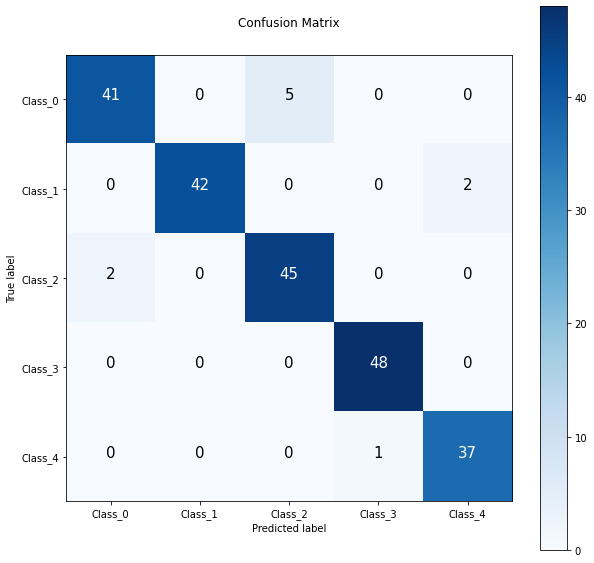

In [52]:
confusion_matrix_basemodel_0 = make_confusion_matrix(y_true=y_test,y_pred=baseline_prediction_model_0,classes=["Class_0","Class_1","Class_2","Class_3","Class_4"])

### Model_1 with Logstic regression 

In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline

In [54]:
model_1 = Pipeline(([
                    ("tfidf",TfidfVectorizer(max_features=2500)),
                    ("clf",LogisticRegression(solver='lbfgs', max_iter=1000))

]))
model_1.fit(x_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer(max_features=2500)),
                ('clf', LogisticRegression(max_iter=1000))])

In [55]:
baseline_score_model_1 = model_1.score(x_test,y_test)
print(f"The accuracy of our model with logistic regression is {baseline_score_model_1*100}%")


The accuracy of our model with logistic regression is 95.51569506726457%


In [56]:
baseline_prediction_model_1= model_1.predict(x_test)

In [57]:
baseline_model_results_1= model_evaluation_matrix(y_true= y_test,y_pred=baseline_prediction_model_1)

In [58]:
baseline_model_results_1_df = pd.DataFrame.from_dict(baseline_model_results_1,orient ='index')

In [59]:
baseline_model_results_1_df

,0
accuracy,0.955157
precision,0.956594
recall,0.955157
f1 score,0.955440


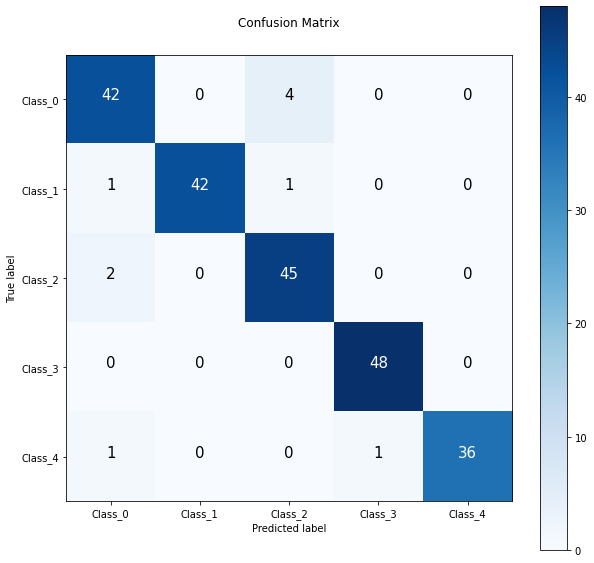

In [60]:
confusion_matrix_basemodel_1 = make_confusion_matrix(y_true=y_test,y_pred=baseline_prediction_model_1,classes=["Class_0","Class_1","Class_2","Class_3","Class_4"])

Model_2 with random forest 

In [61]:
from sklearn.ensemble import RandomForestClassifier

model_2  = Pipeline([
                    ("tfidf",TfidfVectorizer(max_features=2500)),
                    ("clf",RandomForestClassifier(n_estimators=200,random_state=0))

])

model_2.fit(x_train,y_train)



Pipeline(steps=[('tfidf', TfidfVectorizer(max_features=2500)),
                ('clf',
                 RandomForestClassifier(n_estimators=200, random_state=0))])

In [62]:
baseline_score_model_2 = model_2.score(x_test,y_test)
print(f"The accuracy of our model with Random forest is {baseline_score_model_2*100}%")

The accuracy of our model with Random forest is 92.82511210762333%


In [63]:
baseline_prediction_model_2 = model_2.predict(x_test)

In [64]:
baseline_model_results_2= model_evaluation_matrix(y_true= y_test,y_pred=baseline_prediction_model_2)

In [65]:
print(baseline_model_results_2)

{'accuracy': 0.9282511210762332, 'precision': 0.9300836963410055, 'recall': 0.9282511210762332, 'f1 score': 0.9286085316390539}


In [66]:
baseline_model_results_2_df=pd.DataFrame.from_dict(baseline_model_results_2,orient="index")

In [67]:
baseline_model_results_2_df

,0
accuracy,0.928251
precision,0.930084
recall,0.928251
f1 score,0.928609


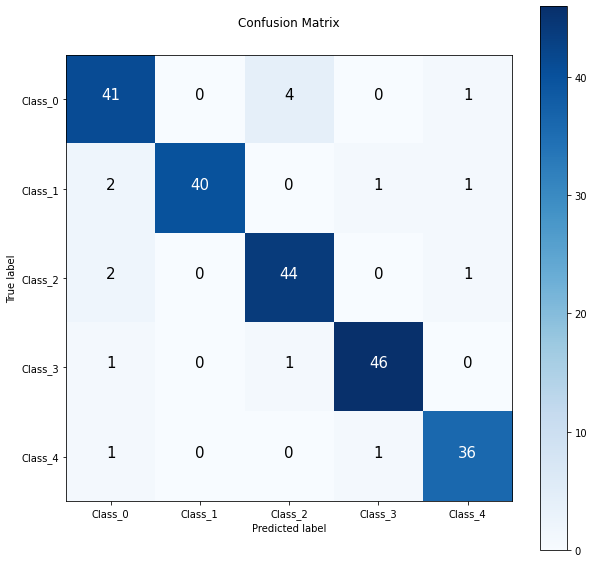

In [68]:
confusion_matrix_basemodel_2 = make_confusion_matrix(y_true=y_test,y_pred=baseline_prediction_model_2,classes=["Class_0","Class_1","Class_2","Class_3","Class_4"])

### MLP Model: Neural Network

In [70]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((2002,), (2002,), (223,), (223,))

In [69]:
import tensorflow as tf
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

In [71]:
# Setting up the text vectorization variables
max_vocab_length =10000
max_length = 200 # We considering 99 percentile information for the max length
text_vectorizer = TextVectorization(max_tokens=max_vocab_length,output_mode="int",output_sequence_length=max_length)

Creating text vectoriser layer 

In [73]:
text_vectorizer.adapt(x_train)

In [74]:
sample_sentence = x_train[0]
text_vectorizer([sample_sentence])

<tf.Tensor: shape=(1, 200), dtype=int64, numpy=
array([[ 119,  209,  296,  975,   72,  937,  109, 4279,   52,  929,  119,
         191,  231, 2068,  101, 2121, 1153,   56,    9,  515,  119, 4803,
         382,  118,    3,   16,  179,  849, 1221, 1296,  606,  196, 1210,
          31, 1260, 7920, 1085,   10,   82,  762,   13,  779,    1,   12,
          99, 1088,  257,  481,  697,  975,  814,   72,  186, 1117, 1831,
        1216,   30,  411,   49, 1406,  837, 1153, 1023,  334,   13,    1,
          82, 2344,  191,  389,  231, 2068, 6807, 4272,   47,   85,  482,
          44,   12, 4466,   32, 1305,  109,  181,    9,  104,  699,   28,
        3430,  470, 3037,  119,  257,   42, 5277,   82,  181,   94, 7295,
         119,    8,  405,   52,  929,  119,   47,   65,  146,  439,   12,
         652,   14,  190, 1001,   52,  929,  429,    9,  470, 3037, 1858,
           8, 1485, 4716,  186,  832, 1404,  108,  683, 1260,    1,  780,
          12,  186, 1117, 1831,   30, 4195,  154,  263, 1964,  6

Creating embedding layer

In [76]:
from tensorflow.keras import layers

embedding = layers.Embedding(input_dim= max_vocab_length,output_dim=128,embeddings_initializer="uniform",input_length=max_length)
embedding 

In [77]:
sample_embedding = embedding(text_vectorizer([sample_sentence]))
sample_embedding

<tf.Tensor: shape=(1, 200, 128), dtype=float32, numpy=
array([[[-0.00191934,  0.01797142,  0.02399598, ...,  0.00339464,
          0.01972504, -0.01777551],
        [-0.01682098, -0.00399894, -0.01501558, ...,  0.02181676,
          0.03184545,  0.02648379],
        [-0.03183348, -0.00308757,  0.0091444 , ...,  0.01262102,
         -0.00702459, -0.03927443],
        ...,
        [-0.01788265,  0.02240613, -0.03025293, ..., -0.03823917,
         -0.00035031,  0.03824754],
        [ 0.01963631,  0.01434549, -0.03732059, ..., -0.00759768,
         -0.0357316 ,  0.01852432],
        [-0.02585931, -0.04362461,  0.03102044, ...,  0.01750762,
         -0.00040501,  0.02553482]]], dtype=float32)>

###Building the MLP Architecture 

In [78]:
from tensorflow.keras import layers 

inputs = layers.Input(shape=(1,),dtype=tf.string) # inputs are 1 -d strings 
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.GlobalAveragePooling1D()(x)
x = layers.Dense(512,activation='relu')(x)
x = layers.Dense(128,activation='relu')(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(32,activation='relu')(x)
outputs = layers.Dense(5,activation='softmax')(x)


model_3 = tf.keras.Model(inputs,outputs,name= "model_3_Dense_MLP")

In [80]:
model_3.summary()

Model: "model_3_Dense_MLP"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization (TextVec  (None, 200)              0         
 torization)                                                     
                                                                 
 embedding_1 (Embedding)     (None, 200, 128)          1280000   
                                                                 
 global_average_pooling1d (G  (None, 128)              0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 512)               66048     
                                                                 
 dense_1 (Dense)             (None, 128)         

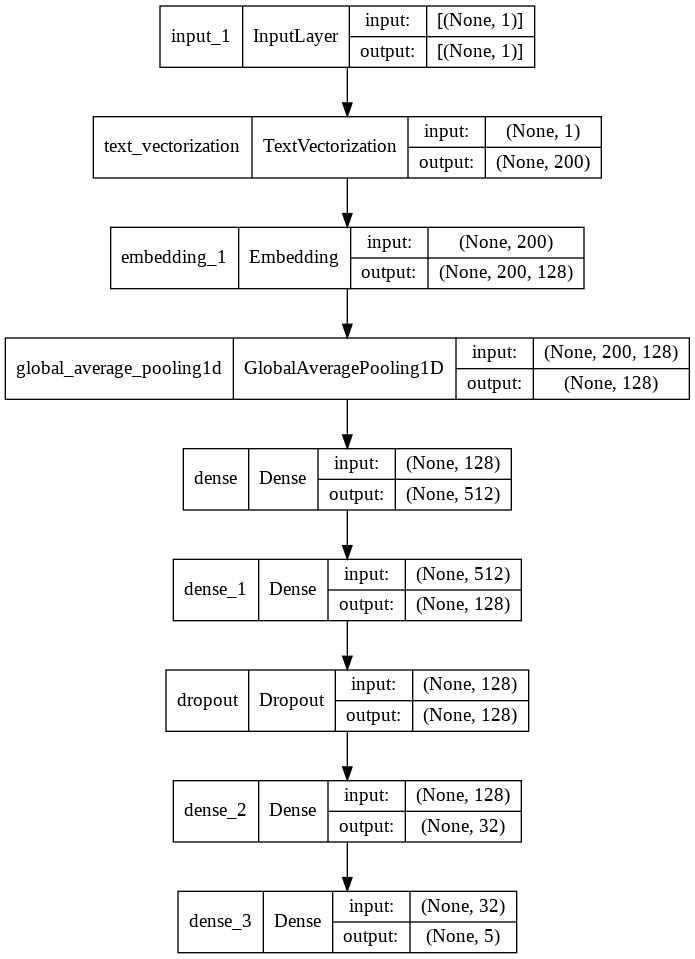

In [81]:
from keras.utils.vis_utils import plot_model
plot_model(model_3,show_shapes=True)

In [82]:
model_3.compile(optimizer= tf.keras.optimizers.Adam(),loss=tf.keras.losses.SparseCategoricalCrossentropy(),metrics=["accuracy"])

In [84]:
SAVE_DIR="/content/drive/MyDrive/NLP/NLP_Projects/BCG_dataset"

In [86]:
model_3_history = model_3.fit(x = x_train,y=y_train,epochs=50,validation_data=(x_test,y_test))

Epoch 1/50
63/63 [==============================] - 3s 9ms/step - loss: 1.3921 - accuracy: 0.4421 - val_loss: 0.7122 - val_accuracy: 0.8700
Epoch 2/50
63/63 [==============================] - 0s 5ms/step - loss: 0.2587 - accuracy: 0.9371 - val_loss: 0.1878 - val_accuracy: 0.9507
Epoch 3/50
63/63 [==============================] - 0s 5ms/step - loss: 0.0407 - accuracy: 0.9910 - val_loss: 0.1967 - val_accuracy: 0.9462
Epoch 4/50
63/63 [==============================] - 0s 6ms/step - loss: 0.0173 - accuracy: 0.9950 - val_loss: 0.2149 - val_accuracy: 0.9507
Epoch 5/50
63/63 [==============================] - 0s 5ms/step - loss: 0.0100 - accuracy: 0.9985 - val_loss: 0.2341 - val_accuracy: 0.9462
Epoch 6/50
63/63 [==============================] - 0s 5ms/step - loss: 0.0041 - accuracy: 0.9995 - val_loss: 0.2239 - val_accuracy: 0.9596
Epoch 7/50
63/63 [==============================] - 0s 5ms/step - loss: 0.0033 - accuracy: 0.9995 - val_loss: 0.2330 - val_accuracy: 0.9552
Epoch 8/50
63/63 [==

In [88]:
pd.DataFrame(model_3_history.history)

,loss,accuracy,val_loss,val_accuracy
0,1.392061,0.442058,0.712215,0.869955
1,0.258727,0.937063,0.187847,0.950673
2,0.040694,0.991009,0.196701,0.946188
3,0.017250,0.995005,0.214931,0.950673
4,0.010038,0.998501,0.234136,0.946188
5,0.004097,0.999501,0.223920,0.959641
6,0.003320,0.999501,0.232987,0.955157
7,0.001783,1.000000,0.254612,0.946188
8,0.001371,1.000000,0.251359,0.959641
9,0.001284,1.000000,0.269072,0.950673


Text(0.5, 1.0, 'Accuracy_Loss_curve for model 3')

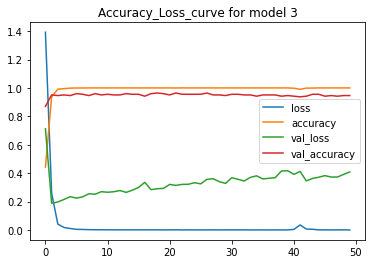

In [89]:
pd.DataFrame(model_3_history.history).plot()
plt.title("Accuracy_Loss_curve for model 3")

In [90]:
model_3.evaluate(x_test,y_test)

7/7 [==============================] - 0s 4ms/step - loss: 0.4087 - accuracy: 0.9462


[0.408705472946167, 0.9461883306503296]

In [91]:
model_3_pred_probs = model_3.predict(x_test)

In [92]:
model_3_pred_probs 

array([[4.2156950e-07, 4.5541665e-08, 9.9999809e-01, 9.0594462e-11,
        1.4376026e-06],
       [9.9999988e-01, 1.1845302e-14, 4.3421107e-08, 2.0720098e-08,
        3.3253087e-08],
       [2.0996906e-24, 1.0000000e+00, 1.9194561e-16, 2.5940387e-16,
        7.1654663e-29],
       ...,
       [4.2564329e-07, 1.0019187e-06, 2.1864763e-10, 9.9999726e-01,
        1.2648622e-06],
       [4.4837607e-06, 1.9180922e-07, 9.9999416e-01, 3.9498921e-10,
        1.1551394e-06],
       [5.5033086e-14, 1.2877191e-15, 1.0000000e+00, 9.0551242e-23,
        1.4745346e-14]], dtype=float32)

In [93]:
model_3_pred = tf.argmax(model_3_pred_probs,axis=1)

In [95]:
model_3_results = model_evaluation_matrix(y_true=y_test,y_pred=model_3_pred)

In [96]:
model_3_results

{'accuracy': 0.9461883408071748,
 'f1 score': 0.9461191685794358,
 'precision': 0.9472324935814351,
 'recall': 0.9461883408071748}

In [98]:
results_model_3=pd.DataFrame.from_dict(model_3_results,orient="index")


In [99]:
results_model_3

,0
accuracy,0.946188
precision,0.947232
recall,0.946188
f1 score,0.946119


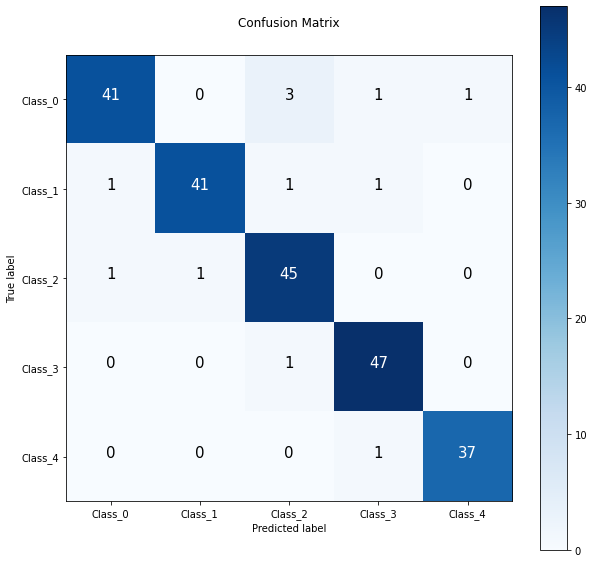

In [100]:
confusion_martrix_3 = make_confusion_matrix(y_true=y_test,y_pred=model_3_pred,classes=["Class_0","Class_1","Class_2","Class_3","Class_4"])

###Transformer Based Model

In [132]:
dataset_cleaned = pd.read_csv("/content/drive/MyDrive/NLP/NLP_Projects/BCG_dataset/cleaned_dataset")

In [133]:
dataset_cleaned.head()

,category,text
0,tech,tv future hand viewer home theatre system plas...
1,business,worldcom bos leave book alone former worldcom ...
2,sport,tiger wary farrell gamble leicester say rush m...
3,sport,yeading face newcastle fa cup premiership side...
4,entertainment,ocean twelve raid box office ocean twelve crim...


In [134]:
X=dataset_cleaned.iloc[:,1]

In [135]:
X.shape

(2225,)

In [136]:
Y=data.iloc[:,0]

In [137]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [138]:
vocab_size = 20000

max_length = 200
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
training_portion = .9

In [139]:
training_size=int(len(X)*training_portion)
X_train = X[:training_size]
Y_train = Y[:training_size]
X_val = X[training_size:]
Y_val = Y[training_size:]

In [140]:
print(training_size)
print(len(X_train))
print(len(Y_train))
print(len(X_val))
print(len(Y_val))

2002
2002
2002
223
223


In [141]:
tokenizer = Tokenizer(num_words = vocab_size,oov_token=oov_tok)
tokenizer.fit_on_texts(X)
word_index = tokenizer.word_index

train_sequences = tokenizer.texts_to_sequences(X_train)
print(train_sequences[0])
print(len(train_sequences[0]))

[119, 202, 306, 976, 72, 1013, 114, 4071, 55, 985, 119, 185, 216, 2039, 99, 1943, 1180, 53, 9, 514, 119, 5030, 380, 120, 3, 16, 178, 842, 1147, 1276, 607, 191, 1148, 30, 1257, 7446, 1049, 10, 84, 771, 13, 772, 9592, 11, 104, 1108, 261, 445, 675, 976, 798, 72, 188, 1133, 1744, 1241, 31, 381, 48, 1440, 780, 1180, 1019, 344, 13, 14852, 84, 2218, 185, 410, 216, 2039, 6743, 4509, 51, 81, 497, 44, 11, 4266, 32, 1171, 114, 180, 9, 106, 676, 29, 3253, 494, 3042, 119, 261, 40, 5031, 84, 180, 94, 7447, 119, 8, 393, 55, 985, 119, 51, 65, 140, 464, 11, 677, 14, 186, 935, 55, 985, 427, 9, 494, 3042, 1944, 8, 1460, 4267, 188, 764, 1397, 108, 640, 1257, 11377, 781, 11, 188, 1133, 1744, 31, 3900, 152, 258, 2014, 726, 49, 739, 1985, 976, 4268, 764, 296, 11, 104, 84, 641, 8, 262, 365, 186, 814, 241, 6744, 48, 44, 1171, 361, 488, 37, 919, 47, 3, 16, 32, 2040, 14853, 68, 879, 9593, 34, 68, 129, 243, 44, 68, 117, 158, 2014, 726, 388, 11378, 117, 641, 1036, 32, 1479, 739, 4268, 342, 765, 232, 445, 739, 439,

In [142]:
validation_sequences = tokenizer.texts_to_sequences(X_val)
print(validation_sequences[0])
print(len(validation_sequences[0]))

[2618, 1580, 5698, 5698, 2, 2537, 3283, 633, 1706, 128, 41, 1, 5599, 47, 348, 566, 733, 90, 690, 171, 102, 2618, 865, 1, 679, 266, 74, 1, 14751, 2689, 779, 3283, 27, 211, 22, 3, 2, 85, 1081, 5, 133, 682, 3121, 2342, 123, 391, 266, 74, 211, 2, 1671, 773, 4151, 1044, 5207, 1706, 1128, 198, 817, 2, 1130, 1548, 1182, 1534, 343, 453, 1135, 266, 74, 211, 2, 3733, 85, 5258, 515, 1747, 1128, 861, 2320, 45, 817, 362, 418, 302, 1, 2618, 453, 5207, 1, 1, 1144, 156, 5698, 1058, 1, 2, 26, 443, 14, 799, 215, 85, 1081, 285, 4008, 171, 2622, 266, 74, 42, 3618, 1, 744, 1, 566, 10649, 85, 1081, 34, 68, 188, 656, 261, 4, 14751, 230, 298, 3283, 313, 292, 279, 664, 904, 935, 4923, 56, 112, 633, 13, 1313, 496, 507, 2747, 861, 2320, 1622, 165, 33, 1414, 211, 26, 1118, 591, 2642, 5207, 26, 1706, 69, 2254, 298, 3283, 657, 4923, 183, 10689, 2, 6084, 5698, 6]
169


In [143]:
label_tokenizer = Tokenizer()
label_tokenizer.fit_on_texts(Y)

training_label_seq = np.array(label_tokenizer.texts_to_sequences(Y_train))
validation_label_seq = np.array(label_tokenizer.texts_to_sequences(Y_val))

In [144]:
training_x =  tf.keras.preprocessing.sequence.pad_sequences(train_sequences, maxlen=max_length)
validation_x = tf.keras.preprocessing.sequence.pad_sequences(validation_sequences, maxlen=max_length)

In [145]:
print(training_x[0].shape)
print(training_x.shape)

(200,)
(2002, 200)


In [146]:
print(validation_x[0].shape)
print(validation_x.shape)

(200,)
(223, 200)


In [147]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [148]:
class TransformerBlock(layers.Layer):
    def __init__(self, embed_dim, num_heads, ff_dim, rate=0.1):
        super(TransformerBlock, self).__init__()
        self.att = layers.MultiHeadAttention(num_heads=num_heads, key_dim=embed_dim)
        self.ffn = keras.Sequential(
            [layers.Dense(ff_dim, activation="relu"), layers.Dense(embed_dim),]
        )
        self.layernorm1 = layers.LayerNormalization(epsilon=1e-6)
        self.layernorm2 = layers.LayerNormalization(epsilon=1e-6)
        self.dropout1 = layers.Dropout(rate)
        self.dropout2 = layers.Dropout(rate)

    def call(self, inputs, training):
        attn_output = self.att(inputs, inputs)
        attn_output = self.dropout1(attn_output, training=training)
        out1 = self.layernorm1(inputs + attn_output)
        ffn_output = self.ffn(out1)
        ffn_output = self.dropout2(ffn_output, training=training)
        return self.layernorm2(out1 + ffn_output)

In [149]:
class TokenAndPositionEmbedding(layers.Layer):
    def __init__(self, maxlen, vocab_size, embed_dim):
        super(TokenAndPositionEmbedding, self).__init__()
        self.token_emb = layers.Embedding(input_dim=vocab_size, output_dim=embed_dim)
        self.pos_emb = layers.Embedding(input_dim=maxlen, output_dim=embed_dim)

    def call(self, x):
        maxlen = tf.shape(x)[-1]
        positions = tf.range(start=0, limit=maxlen, delta=1)
        positions = self.pos_emb(positions)
        x = self.token_emb(x)
        return x + positions

In [150]:
embed_dim = 32  # Embedding size for each token
num_heads = 4  # Number of attention heads
ff_dim = 32  # Hidden layer size in feed forward network inside transformer

inputs = layers.Input(shape=(max_length,))
embedding_layer = TokenAndPositionEmbedding(max_length, vocab_size, embed_dim)
x = embedding_layer(inputs)
transformer_block = TransformerBlock(embed_dim, num_heads, ff_dim)
x = transformer_block(x)
x = layers.GlobalAveragePooling1D()(x)
x = layers.Dropout(0.1)(x)
x = layers.Dense(20, activation="relu")(x)
x = layers.Dropout(0.1)(x)
outputs = layers.Dense(6, activation="softmax")(x)

model = keras.Model(inputs=inputs, outputs=outputs)

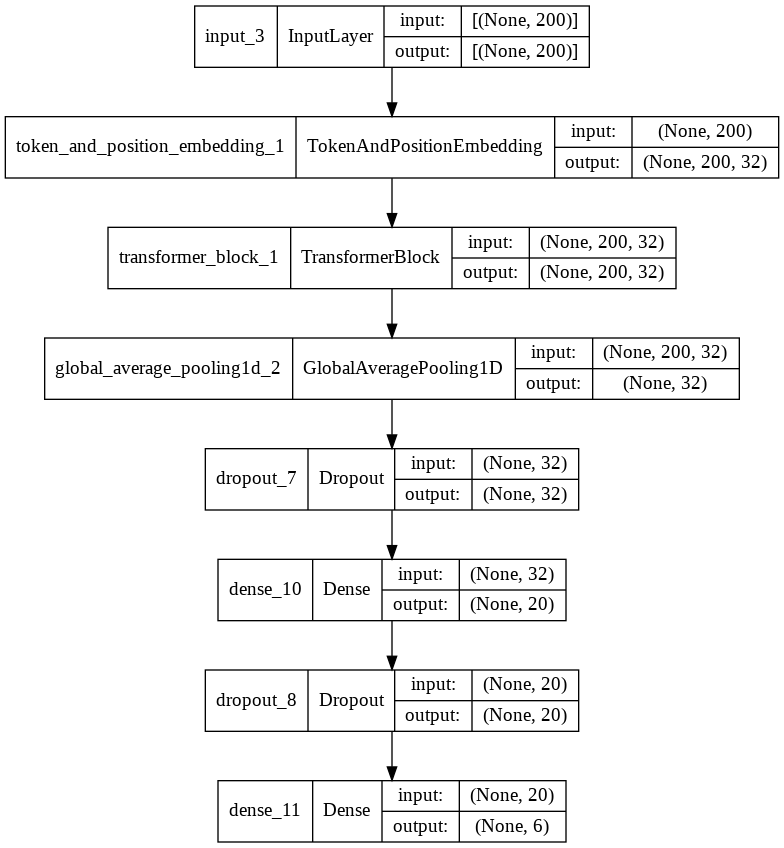

In [151]:
from keras.utils.vis_utils import plot_model
plot_model(model,show_shapes=True)

In [152]:
model.compile("adam", "sparse_categorical_crossentropy", metrics=["accuracy"])
history = model.fit(
   training_x,training_label_seq, batch_size=32, epochs=50, validation_data=(validation_x,validation_label_seq)
)

Epoch 1/50
63/63 [==============================] - 2s 12ms/step - loss: 1.2084 - accuracy: 0.5330 - val_loss: 0.5311 - val_accuracy: 0.9058
Epoch 2/50
63/63 [==============================] - 1s 8ms/step - loss: 0.2207 - accuracy: 0.9580 - val_loss: 0.1535 - val_accuracy: 0.9552
Epoch 3/50
63/63 [==============================] - 1s 8ms/step - loss: 0.0464 - accuracy: 0.9950 - val_loss: 0.1424 - val_accuracy: 0.9641
Epoch 4/50
63/63 [==============================] - 1s 8ms/step - loss: 0.0205 - accuracy: 0.9990 - val_loss: 0.1496 - val_accuracy: 0.9552
Epoch 5/50
63/63 [==============================] - 1s 8ms/step - loss: 0.0128 - accuracy: 0.9990 - val_loss: 0.1665 - val_accuracy: 0.9552
Epoch 6/50
63/63 [==============================] - 1s 8ms/step - loss: 0.0095 - accuracy: 0.9990 - val_loss: 0.1855 - val_accuracy: 0.9552
Epoch 7/50
63/63 [==============================] - 1s 8ms/step - loss: 0.0075 - accuracy: 0.9990 - val_loss: 0.1904 - val_accuracy: 0.9596
Epoch 8/50
63/63 [=

In [153]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,1.208375,0.532967,0.531114,0.905830
1,0.220749,0.958042,0.153471,0.955157
2,0.046409,0.995005,0.142443,0.964126
3,0.020495,0.999001,0.149597,0.955157
4,0.012846,0.999001,0.166547,0.955157
5,0.009465,0.999001,0.185525,0.955157
6,0.007540,0.999001,0.190432,0.959641
7,0.004401,1.000000,0.178936,0.959641
8,0.005998,0.999001,0.198658,0.955157
9,0.003153,1.000000,0.190616,0.955157


Text(0.5, 1.0, 'Accuracy-loss-Curve-attention_based_model')

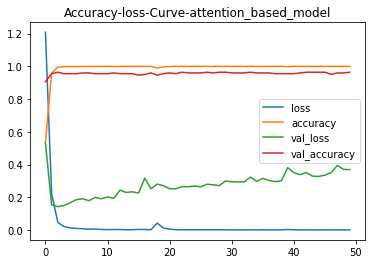

In [154]:
pd.DataFrame(history.history).plot()
plt.title("Accuracy-loss-Curve-attention_based_model")

In [155]:
model.evaluate(validation_x,validation_label_seq)

7/7 [==============================] - 0s 5ms/step - loss: 0.3685 - accuracy: 0.9641


[0.36853116750717163, 0.9641255736351013]

In [156]:
model_pred_proba = model.predict(validation_x)

In [157]:
model_pred = tf.argmax(model_pred_proba,axis=1)

In [158]:
model_results = model_evaluation_matrix(y_true=validation_label_seq,y_pred=model_pred)

In [159]:
model_results

{'accuracy': 0.9641255605381166,
 'f1 score': 0.9639001695373143,
 'precision': 0.9646532131857579,
 'recall': 0.9641255605381166}

In [160]:
results_model=pd.DataFrame.from_dict(model_results,orient="index")

In [161]:
results_model

,0
accuracy,0.964126
precision,0.964653
recall,0.964126
f1 score,0.963900


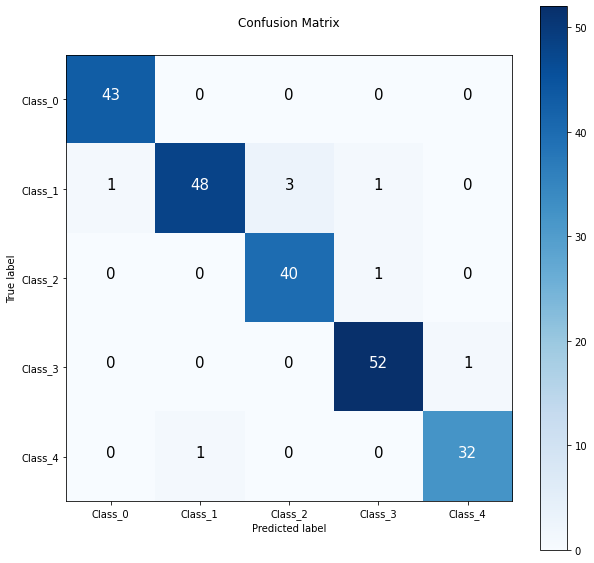

In [162]:
confusion_martrix_transformer = make_confusion_matrix(y_true=validation_label_seq,y_pred=model_pred,classes=["Class_0","Class_1","Class_2","Class_3","Class_4"])

In [165]:
results = pd.concat([baseline_model_results_0_df,baseline_model_results_1_df,baseline_model_results_2_df,results_model_3,results_model],axis=1)

In [166]:
results.columns =['Naive Bayes', 'Logistic Regression', 'Random Forest', 'MLP','Transformer_Based']

In [167]:
results

,Naive Bayes,Logistic Regression,Random Forest,MLP,Transformer_Based
accuracy,0.955157,0.955157,0.928251,0.946188,0.964126
precision,0.956198,0.956594,0.930084,0.947232,0.964653
recall,0.955157,0.955157,0.928251,0.946188,0.964126
f1 score,0.955120,0.955440,0.928609,0.946119,0.963900
